## NIRMAL JOY 
## Запорожская улица, 21, Санкт-Петербург

In [1]:
#install packages pandas 
!pip install pandas
#install packages matplotlib
!pip install matplotlib

In [2]:
# load library pandas as pd
import pandas as pd
# load library matplotlib as plt
import matplotlib.pyplot as plt

In [3]:
# loading the dataset "data.xlsx"
df = pd.read_excel("C:/Users/amalj/OneDrive/Desktop/new tsk/ТЗ Младший аналитик/data.xlsx")

In [4]:
df.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00


In [5]:
# Finding the indeces To determine the data limits of each month 
may_indices = df.loc[df['status'] == 'Май 2021'].index
june_indices = df.loc[df['status'] == 'Июнь 2021'].index
july_indices = df.loc[df['status'] == 'Июль 2021'].index
august_indices = df.loc[df['status'] == 'Август 2021'].index
september_indices = df.loc[df['status'] == 'Сентябрь 2021'].index
october_indices = df.loc[df['status'] == 'Октябрь 2021'].index
last_row_index = df.index[-1]
# print the indices of month 
print(may_indices)
print(june_indices)
print(july_indices)
print(august_indices)
print(september_indices)
print(october_indices)
print(last_row_index)

Int64Index([0], dtype='int64')
Int64Index([129], dtype='int64')
Int64Index([258], dtype='int64')
Int64Index([369], dtype='int64')
Int64Index([484], dtype='int64')
Int64Index([594], dtype='int64')
729


### 1.Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не росрочен

In [6]:
july_data = df.iloc[130:257] 
july_data = july_data[july_data['status'] != 'ПРОСРОЧЕНО']
# Calculate total revenue
july_revenue = july_data['sum'].sum()

print(f"The total revenue for July 2021 for transactions whose cash receipts are not overdue is: ${july_revenue:.2f}")

The total revenue for July 2021 for transactions whose cash receipts are not overdue is: $794898.71


In [7]:
# To understand the datatype of date column 
print(df['receiving_date'].dtype)

object


In [8]:
# Changing datatype of date into datetime64[ns]
df['receiving_date'] = pd.to_datetime(df['receiving_date'], format='%Y-%m-%d', errors='coerce')

In [9]:
print(df['receiving_date'].dtype)

datetime64[ns]


### 2.Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

In [10]:
df1 = df.copy()  # Create a copy of the original DataFrame

df1 = df1.dropna(subset=['receiving_date']) # removing row that contains null data in recieveing_date column

<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='receiving_date'>

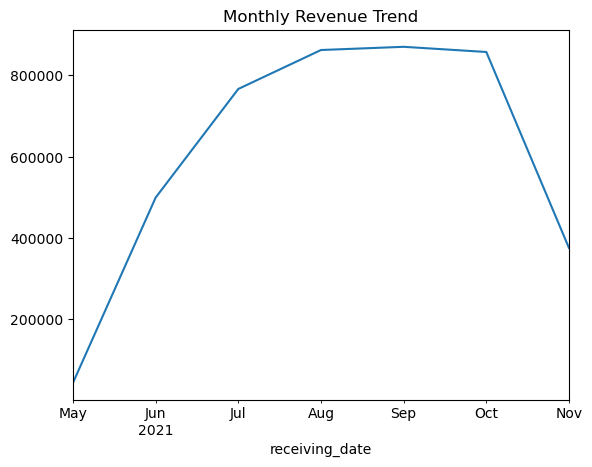

In [11]:
# Calculate monthly revenue of each month 
monthly_revenue = df1.groupby(df1['receiving_date'].dt.to_period('M'))['sum'].sum()

# plotting of monthly revenue trend during the period
monthly_revenue.plot(kind='line', title='Monthly Revenue Trend')


### 3.Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [12]:
september_data = df.loc[485:593]
manager_cash = september_data.groupby('sale')['sum'].sum()

In [13]:
# calculating the manager and raised amount
top_manager = manager_cash.idxmax()
cash_raised = manager_cash.max()

In [14]:
print(f"The manager who raised the most cash in September 2021 is {top_manager}.")
print(f"{top_manager} raised a total of {cash_raised} dollars.")

The manager who raised the most cash in September 2021 is Смирнов.
Смирнов raised a total of 221525.7 dollars.


### 4.Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [15]:
# Step 1: Filter data for October 2021
october_data = df.iloc[525:730]

In [16]:
deal_counts = october_data['new/current'].value_counts()

# Step 3: Determine dominant deal type
dominant_deal_type = deal_counts.idxmax()

# Print the result
print(f"The dominant deal type in October 2021 was: {dominant_deal_type}")

The dominant deal type in October 2021 was: текущая


### 5.Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [17]:
may_data = df.iloc[1:128]
june_transaction = may_data[may_data['receiving_date'].dt.month == 6]
count_of_transactions = june_transaction[june_transaction['document'] == 'оригинал'].shape[0]
print(f'Count of "оригинал"  May transactions were received in June 2021: {count_of_transactions}')

Count of "оригинал"  May transactions were received in June 2021: 75


###  За каждую заключенную сделку менеджер получает бонус, который рассчитывается следующим образом.

In [18]:
def bonus(df):
    res = 0
    if (df['new/current'] == "новая") & (df['document'] == "оригинал") & (df['status'] == "ОПЛАЧЕНО"):
        res = df['sum'] * 0.07
    elif (df['new/current'] == "текущая") & (df['document'] == "оригинал") & (df['status'] != "ПРОСРОЧЕНО") & (df['sum'] > 10000):
        res = df['sum'] * 0.05
    elif (df['new/current'] == "текущая") & (df['document'] == "оригинал") & (df['status'] != "ПРОСРОЧЕНО") & (df['sum'] < 10000):
        res = df['sum'] * 0.03
    return res

df['bonus'] = df.apply(bonus, axis=1)

In [19]:
df.query('receiving_date < "2021-07-01" and receiving_date > "2021-05-31"').groupby('sale')['bonus'].sum()

sale
Андреев       2962.1717
Васильев       339.2310
Иванов        2503.8390
Кузнецова     2604.6716
Петрова       7028.8020
Селиванов      353.3220
Смирнов       4078.7240
Филимонова     306.0720
Name: bonus, dtype: float64